# Vehicle Price Evaluation


## **One-Page Synthesis**

#### **A. Objective Insights (What the data/experiments show)**

1. **Target & Task**:  
   - Target = `vehicle_price`.  
   - Task = Regression.

2. **One-Line Performance Baseline**:  
   - Baseline = mean absolute error (MAE) = 6931.903438194445, R2 = 0.8260602424593553.  
   - Chosen model performance = RandomForestRegressor.

3. **2-3 Useful Findings from Data/Models**:  
   - Targer Variable `Price` has low correlation with the other features.  
   - Data is imbalanced, with most of the vehicles being from the more popular brands.
   - Removing outliers improved model performance by 10%.

4. **Model Reliability**:  
   - Cross-validation scores are stable
   - Still more to be done

5. **Decision I Make Now Because of These Findings**:  
   - Use Random Forest instead of Linear Regression due to non-linear relationships.
   - Scrape more data

---

#### **B. Subjective Insights (What you learned)**

1. **What Surprised You or What You Don’t Understand Yet**:  
   - Why `price` has a weaker correlation than expected.

2. **Which Design Choice Might Introduce Bias (and Why)**:  
   - Dropping rows with missing values might exclude older vehicles, introducing bias.
   - Using only recent data might ignore trends in older vehicle pricing.

3. **If You Had 2 More Hours, You Would Try**:    
   - Adding external data like more detailed state of vehicle eg. any tunes or recent repairs to improve predictions.

4. **How This Work Helps the Stakeholder / Why It Matters**:  
   - Helps car dealerships price vehicles competitively.
   - Helps buyers to that are not sure if a listing is fairly priced.

5. **One Thing You’d Explain Differently to a Teammate**:  
   - The importance of encoding and scaling.
---

This synthesis block ensures you summarize your findings and learning before diving into the code. Let me know if you need help filling in specific sections!

# Imports

In [400]:
# Data manipulation
import pandas as pd
import numpy as np  

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score




# Data Understanding, Cleaning & Preparation


### Getting to know with the data

In [401]:
df_before = pd.read_csv("auto_bg_cars.csv")
df_before.duplicated().value_counts()
df_before.drop_duplicates(inplace=True)


In [402]:
df_before.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6552 entries, 0 to 7325
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Listing_ID       6552 non-null   int64  
 1   Title            6552 non-null   object 
 2   Price            6552 non-null   object 
 3   URL              6552 non-null   object 
 4   Модел            6548 non-null   object 
 5   Цена             6548 non-null   object 
 6   Състояние        6548 non-null   object 
 7   Тип              6548 non-null   object 
 8   Произведено      6548 non-null   object 
 9   Тип двигател     6548 non-null   object 
 10  Мощност[к.с.]    5945 non-null   object 
 11  Скоростна кутия  6548 non-null   object 
 12  Цвят             5710 non-null   object 
 13  Пробег           6548 non-null   object 
 14  Unnamed: 14      0 non-null      float64
 15  Unnamed: 15      0 non-null      float64
 16  Unnamed: 16      0 non-null      float64
 17  Unnamed: 17      0 

In [403]:
df_before.isna().sum()

Listing_ID            0
Title                 0
Price                 0
URL                   0
Модел                 4
Цена                  4
Състояние             4
Тип                   4
Произведено           4
Тип двигател          4
Мощност[к.с.]       607
Скоростна кутия       4
Цвят                842
Пробег                4
Unnamed: 14        6552
Unnamed: 15        6552
Unnamed: 16        6552
Unnamed: 17        6552
Unnamed: 18        6552
Unnamed: 19        6552
Unnamed: 20        6552
Unnamed: 21        6552
Unnamed: 22        6552
Unnamed: 23        6552
Unnamed: 24        6552
Unnamed: 25        6552
Unnamed: 26        6552
Unnamed: 27        6552
Unnamed: 28        6552
dtype: int64

### Removing columns that will not be needed

In [404]:
df_before.drop(columns=["Unnamed: 14", "Unnamed: 15","Unnamed: 16","Unnamed: 17", "Unnamed: 18"
                        ,"Unnamed: 19","Unnamed: 20", "Unnamed: 21", "Unnamed: 22", "Unnamed: 23"
                        , "Unnamed: 24", "Unnamed: 25", "Unnamed: 26","Unnamed: 27","Unnamed: 28","Price"], inplace=True)
df_before.columns

Index(['Listing_ID', 'Title', 'URL', 'Модел', 'Цена', 'Състояние', 'Тип',
       'Произведено', 'Тип двигател', 'Мощност[к.с.]', 'Скоростна кутия',
       'Цвят', 'Пробег'],
      dtype='object')

In [405]:
df_before.columns

Index(['Listing_ID', 'Title', 'URL', 'Модел', 'Цена', 'Състояние', 'Тип',
       'Произведено', 'Тип двигател', 'Мощност[к.с.]', 'Скоростна кутия',
       'Цвят', 'Пробег'],
      dtype='object')

### Renaming the columns 

In [406]:
df_before.rename(columns={
   "Модел": "Model",
   "Цена": "Price",
   "Състояние": "Condition",
   "Тип": "Type",
   "Произведено": "Manufactured",
   "Тип двигател": "Engine Type",
   "Мощност[к.с.]": "Power [hp]",
   "Скоростна кутия": "Transmission",
   "Цвят": "Color",
   "Пробег": "Mileage"
   }, inplace=True)

In [407]:
df_before.columns

Index(['Listing_ID', 'Title', 'URL', 'Model', 'Price', 'Condition', 'Type',
       'Manufactured', 'Engine Type', 'Power [hp]', 'Transmission', 'Color',
       'Mileage'],
      dtype='object')

In [408]:
df_before.sample(5)

,Listing_ID,Title,URL,Model,Price,Condition,Type,Manufactured,Engine Type,Power [hp],Transmission,Color,Mileage
5878,22756447,Skoda Octavia WRS,https://www.auto.bg/obiava/22756447/skoda-octa...,Skoda Octavia,26 000 лв.,Употребяван,Комби,декември 2016 г.,Skoda Octavia Дизел,184 к.с,Автоматична,Бял,108900 км
5870,61563790,BMW 328 * xDrive * CARFAX * БЕЗ ПЪРВОНАЧАЛНА В...,https://www.auto.bg/obiava/61563790/bmw-328-xd...,BMW 328,19 450 лв.,Употребяван,Седан,януари 2016 г.,BMW 328 Бензин,241 к.с,Автоматична,NaN,183197 км
3852,54933833,Skoda Octavia Facelift* 2021г-Заводски Метан* ...,https://www.auto.bg/obiava/54933833/skoda-octa...,Skoda Octavia,19 999 лв.,Употребяван,Комби,януари 2021 г.,Skoda Octavia Бензин,150 к.с,Автоматична,Бял,129378 км
1239,59967050,Lexus GX 470 4.7 V8 Бартер,https://www.auto.bg/obiava/59967050/lexus-gx-4...,Lexus GX 470,24 900 лв.,Употребяван,Джип,август 2005 г.,Lexus GX 470 Бензин,240 к.с,Автоматична,Сив,190000 км
5920,67910834,Audi Q7 Premium Plus,https://www.auto.bg/obiava/67910834/audi-q7-pr...,Audi Q7,61 300 лв.,Употребяван,Джип,ноември 2021 г.,Audi Q7 Бензин,335 к.с,Автоматична,NaN,78900 км


In [409]:
print(df_before.columns)


Index(['Listing_ID', 'Title', 'URL', 'Model', 'Price', 'Condition', 'Type',
       'Manufactured', 'Engine Type', 'Power [hp]', 'Transmission', 'Color',
       'Mileage'],
      dtype='object')


### Cleaning unrealistic prices from listings or empty ones

In [410]:
price_counts = df_before['Price'].value_counts()
print(price_counts)

Price
11 лв.                393
8 500 лв.              56
Цена по договаряне     54
4 500 лв.              49
12 500 лв.             47
                     ... 
1 500 EUR               1
36 490 лв.              1
8 399 лв.               1
6 350 лв.               1
38 413 лв.              1
Name: count, Length: 1619, dtype: int64


In [411]:
df_before['Price'] = df_before['Price'].replace('Цена по договаряне', np.nan)

In [412]:
price_counts = df_before['Price'].value_counts()
print(price_counts)

Price
11 лв.        393
8 500 лв.      56
4 500 лв.      49
12 500 лв.     47
6 500 лв.      46
             ... 
6 199 лв.       1
76 699 лв.      1
48 699 лв.      1
60 000 EUR      1
38 413 лв.      1
Name: count, Length: 1618, dtype: int64


In [413]:
df_before['Price'] = df_before['Price'].astype(str)

df_before['Numeric_Price'] = (
    df_before['Price']
    .str.replace(r'[^\d\s.]', '', regex=True)  
    .str.replace(r'\s+', '', regex=True)  
    .replace('', None)  
    .astype(float)  
)

df_before = df_before[df_before['Numeric_Price'] >= 400]

In [414]:
price_counts = df_before['Price'].value_counts()
print(price_counts)

Price
8 500 лв.     56
4 500 лв.     49
12 500 лв.    47
6 500 лв.     46
10 500 лв.    46
              ..
8 399 лв.      1
6 350 лв.      1
70 670 лв.     1
9 399 лв.      1
38 413 лв.     1
Name: count, Length: 1597, dtype: int64


In [415]:
df_before['Price'] = df_before['Price'].astype(str)

df_before['Price'] = (
    df_before['Price']
    .str.replace(r'\s+', '', regex=True)  
    .str.replace('лв.', '', regex=False)  
    .str.replace('EUR', '', regex=False)  
    .replace(r'[^\d.]', '', regex=True)  
)

df_before['Price'] = df_before['Price'].astype(float)

In [416]:
df_before.sample(10)

,Listing_ID,Title,URL,Model,Price,Condition,Type,Manufactured,Engine Type,Power [hp],Transmission,Color,Mileage,Numeric_Price
84,13562326,Renault Megane 1.9 dci кабрио,https://www.auto.bg/obiava/13562326/renault-me...,Renault Megane,2600.0,Употребяван,Кабрио,юли 2004 г.,Renault Megane Дизел,120 к.с,Ръчна,Черен,269000 км,2600.0
1394,23345504,BMW 540 M SPORT LINE* FULL* Масаж*,https://www.auto.bg/obiava/23345504/bmw-540-m-...,BMW 540,34500.0,Употребяван,Седан,май 2018 г.,BMW 540 Бензин,335 к.с,Автоматична,Сив,248626 км,34500.0
4169,28740775,Mercedes-Benz S 500 L+ 4MATIC+ Soft+ Panorama,https://www.auto.bg/obiava/28740775/mercedes-b...,Mercedes-Benz S 500,58500.0,Употребяван,Стреч лимузина,септември 2016 г.,Mercedes-Benz S 500 Бензин,455 к.с,Автоматична,Черен,211000 км,58500.0
5787,27553910,BMW 525,https://www.auto.bg/obiava/27553910/bmw-525,BMW 525,17000.0,Употребяван,Седан,август 2011 г.,BMW 525 Дизел,NaN,Автоматична,NaN,230000 км,17000.0
5314,85196993,BMW X3 M40d,https://www.auto.bg/obiava/85196993/bmw-x3-m40d,BMW X3,43000.0,Употребяван,Джип,септември 2022 г.,BMW X3 Дизел,340 к.с,Автоматична,Сив,75000 км,43000.0
2303,62379683,Audi A5 Audi A5 3.0 TDI Quattro | Chip | Sport...,https://www.auto.bg/obiava/62379683/audi-a5-au...,Audi A5,13600.0,Употребяван,Купе,юли 2007 г.,Audi A5 Дизел,298 к.с,Ръчна,Черен,245000 км,13600.0
124,87557601,Opel Vectra,https://www.auto.bg/obiava/87557601/opel-vectra,Opel Vectra,1800.0,Употребяван,Комби,август 2000 г.,Opel Vectra Дизел,100 к.с,Ръчна,Светло сив,232000 км,1800.0
2562,47311371,Mercedes-Benz EQA 300 4Matic = AMG Line = Adva...,https://www.auto.bg/obiava/47311371/mercedes-b...,Mercedes-Benz EQA,75500.0,Употребяван,Джип,юли 2024 г.,Mercedes-Benz EQA Електрически,228 к.с,Автоматична,Бял,8000 км,75500.0
6982,69514858,BMW 330 d xDrive LCI (FaceLift) ! M Pack ! SWI...,https://www.auto.bg/obiava/69514858/bmw-330-d-...,BMW 330,18900.0,Употребяван,Комби,януари 2012 г.,BMW 330 Дизел,245 к.с,Автоматична,Черен,269000 км,18900.0
2493,35855850,Peugeot 2008 1.2i* 82к.c* Euro 6B* Лизинг,https://www.auto.bg/obiava/35855850/peugeot-20...,Peugeot 2008,10900.0,Употребяван,Миниван,декември 2015 г.,Peugeot 2008 Бензин,82 к.с,Ръчна,Сив,145000 км,10900.0


In [417]:
df_before = df_before.drop(columns=['Numeric_Price'])

In [418]:
print(df_before.columns)

Index(['Listing_ID', 'Title', 'URL', 'Model', 'Price', 'Condition', 'Type',
       'Manufactured', 'Engine Type', 'Power [hp]', 'Transmission', 'Color',
       'Mileage'],
      dtype='object')


### Extracting only the year from Manufactured

In [419]:
df_before['Manufactured'] = df_before['Manufactured'].str.extract(r'(\d{4})').astype(int)

In [420]:
print(df_before['Manufactured'].dtype) 
print(df_before['Manufactured'].head())

int64
0    2018
1    2009
2    2009
3    2003
4    2013
Name: Manufactured, dtype: int64


### Extracting only the Fuel of the Engine 

In [421]:
df_before['Engine Type'] = df_before['Engine Type'].str.split().str[-1]

In [422]:
df_before['Engine Type'].value_counts()

Engine Type
Дизел           2972
Бензин          2724
Хибриден         135
Електрически     108
Газ               56
хибрид            49
Name: count, dtype: int64

### Extracting only the hp's from Power [hp]

In [423]:
df_before['Power [hp]'] = df_before['Power [hp]'].str.extract(r'(\d+)').astype(float)

In [424]:
print(df_before['Power [hp]'].head())

0    100.0
1    109.0
2    272.0
3    163.0
4    140.0
Name: Power [hp], dtype: float64


In [425]:
df_before['Mileage'] = df_before['Mileage'].str.extract(r'(\d+)').astype(float)

In [426]:
print(df_before['Mileage'].head())

0    129576.0
1    202740.0
2    218000.0
3    248000.0
4    192800.0
Name: Mileage, dtype: float64


In [427]:
df_before.sample(5)

,Listing_ID,Title,URL,Model,Price,Condition,Type,Manufactured,Engine Type,Power [hp],Transmission,Color,Mileage
6437,78130290,Peugeot 307 2.0HDi~136hp~АВТОМАТ~КСЕНОН~ПАНОРА...,https://www.auto.bg/obiava/78130290/peugeot-30...,Peugeot 307,5999.0,Употребяван,Комби,2009,Дизел,136.0,Автоматична,Tъмно син,219000.0
3729,29766288,Ford F150 Raptor* SuperCrew* ПОДГРЕВ* ОБДУХ* 3...,https://www.auto.bg/obiava/29766288/ford-f150-...,Ford F150,62500.0,Употребяван,Пикап,2017,Бензин,450.0,Автоматична,NaN,209755.0
37,41259929,Hyundai Santa fe * АВТО КРЕДИТ* ЦЕНА ДО БГ * C...,https://www.auto.bg/obiava/41259929/hyundai-sa...,Hyundai Santa fe,18999.0,Употребяван,Джип,2018,Бензин,185.0,Автоматична,NaN,196312.0
2177,68997477,Audi A6 * 3.0T TECHNIK * CARFAX * БЕЗ ПЪРВОНАЧ...,https://www.auto.bg/obiava/68997477/audi-a6-3-...,Audi A6,22000.0,Употребяван,Седан,2017,Бензин,333.0,Ръчна,NaN,154536.0
2339,51728518,Citroen C3 1.6HDI* EXCLUSIVE*,https://www.auto.bg/obiava/51728518/citroen-c3...,Citroen C3,7700.0,Употребяван,Хечбек,2010,Дизел,90.0,Ръчна,Тъмно сив,168000.0


In [428]:
missing_percentage = df_before.isnull().mean() * 100
print(missing_percentage)

Listing_ID       0.000000
Title            0.000000
URL              0.000000
Model            0.000000
Price            0.000000
Condition        0.000000
Type             0.000000
Manufactured     0.000000
Engine Type      0.000000
Power [hp]       6.287227
Transmission     0.000000
Color           10.473197
Mileage          0.000000
dtype: float64


In [429]:
print(df_before.dtypes)

Listing_ID        int64
Title            object
URL              object
Model            object
Price           float64
Condition        object
Type             object
Manufactured      int64
Engine Type      object
Power [hp]      float64
Transmission     object
Color            object
Mileage         float64
dtype: object


### Separating the Brand from the Model

In [430]:
brands = [
    "Land Rover", "Mercedes-Benz", "BMW", "Audi", "Toyota", "Nissan", "Honda", "Ford", "Hyundai",
    "Volkswagen", "Chevrolet", "Mazda", "Jeep", "Porsche", "Mini", "Volvo", "Kia", "Opel", "Skoda",
    "Peugeot", "Renault", "Fiat", "Bentley", "Infiniti", "Suzuki", "Chrysler", "Dodge", "Seat",
    "Mitsubishi", "Smart", "Acura", "Alfa Romeo", "Aston Martin", "Cadillac", "Citroen","Daewoo", "DR", "VW"
]

def extract_brand(model):
    for brand in brands:
        if model.startswith(brand):
            return brand
    return None  

df_before['Brand'] = df_before['Model'].apply(extract_brand)

df_before['Model_Name'] = df_before.apply(
    lambda row: row['Model'].replace(row['Brand'], '').strip() if row['Brand'] else row['Model'],
    axis=1
)

df_before['Brand'] = df_before['Brand'].fillna(df_before['Model'].str.split().str[0])

print(df_before[['Model', 'Brand', 'Model_Name']].sample(20))

                      Model          Brand  Model_Name
3853          Skoda Octavia          Skoda     Octavia
1235             Fiat Stilo           Fiat       Stilo
55          Chevrolet Tahoe      Chevrolet       Tahoe
872           Skoda Octavia          Skoda     Octavia
5440               Fiat 500           Fiat         500
4579    Mercedes-Benz E 400  Mercedes-Benz       E 400
7169         Hyundai Sonata        Hyundai      Sonata
5373           Kia Sportage            Kia    Sportage
549             Suzuki X-90         Suzuki        X-90
747              Opel Astra           Opel       Astra
2352    Mercedes-Benz E 220  Mercedes-Benz       E 220
3462                Audi Q7           Audi          Q7
1577        Audi A4 Allroad           Audi  A4 Allroad
2688               Kia Ceed            Kia        Ceed
4059                BMW 330            BMW         330
2852                 BMW X3            BMW          X3
3534                Audi A4           Audi          A4
1499  Merc

In [431]:
df_before.sample(5)

,Listing_ID,Title,URL,Model,Price,Condition,Type,Manufactured,Engine Type,Power [hp],Transmission,Color,Mileage,Brand,Model_Name
6664,18418945,Mercedes-Benz E 220 2.2CDI-150кс= АВТОМАТ= НАВ...,https://www.auto.bg/obiava/18418945/mercedes-b...,Mercedes-Benz E 220,5900.0,Употребяван,Комби,2003,Дизел,150.0,Автоматична,Сив,211000.0,Mercedes-Benz,E 220
1570,58264970,"BMW 330 2.0L I-4 DI, DOHC, VVT, TURBO, 255HP R...",https://www.auto.bg/obiava/58264970/bmw-330-2-...,BMW 330,37100.0,Употребяван,Седан,2020,Бензин,NaN,Автоматична,NaN,98955.0,BMW,330
1581,33054066,"Jeep Grand Wagoneer 3.0L I-6 DI, DOHC, VVT, TU...",https://www.auto.bg/obiava/33054066/jeep-grand...,Jeep Grand Wagoneer,105500.0,Употребяван,Седан,2024,Бензин,NaN,Автоматична,NaN,84332.0,Jeep,Grand Wagoneer
2567,81420377,BMW 325 325 Xi,https://www.auto.bg/obiava/81420377/bmw-325-32...,BMW 325,6500.0,Употребяван,Комби,2008,Бензин,204.0,Автоматична,Черен,244000.0,BMW,325
6064,27099561,Hyundai Santa fe 2.4 бензин,https://www.auto.bg/obiava/27099561/hyundai-sa...,Hyundai Santa fe,4500.0,Употребяван,Джип,2006,Газ,136.0,Ръчна,NaN,270000.0,Hyundai,Santa fe


In [432]:
df_before = df_before.drop(columns=['Model'])

In [433]:
print(df_before.columns)

Index(['Listing_ID', 'Title', 'URL', 'Price', 'Condition', 'Type',
       'Manufactured', 'Engine Type', 'Power [hp]', 'Transmission', 'Color',
       'Mileage', 'Brand', 'Model_Name'],
      dtype='object')


In [434]:
print(df_before.isnull().sum())

Listing_ID        0
Title             0
URL               0
Price             0
Condition         0
Type              0
Manufactured      0
Engine Type       0
Power [hp]      380
Transmission      0
Color           633
Mileage           0
Brand             0
Model_Name        0
dtype: int64


### Removing columns that will not be in use for prediction due to missing data or just not needed

In [435]:
df_before = df_before.drop(columns=['Color'])
df_before = df_before.drop(columns=['Listing_ID'])
df_before = df_before.drop(columns=['Title'])
df_before = df_before.drop(columns=['URL'])

In [436]:
df_before['Transmission'] = df_before['Transmission'].fillna('Unknown')
df_before['Mileage'] = df_before['Mileage'].fillna(df_before['Mileage'].median())
df_before['Power [hp]'] = df_before['Power [hp]'].fillna(df_before['Power [hp]'].median())

In [437]:
df_before["Price"].value_counts()

Price
8500.0     59
4500.0     49
12500.0    47
10500.0    46
6500.0     46
           ..
85999.0     1
87250.0     1
65300.0     1
34600.0     1
38413.0     1
Name: count, Length: 1494, dtype: int64

In [438]:
df_before.sample(50)

,Price,Condition,Type,Manufactured,Engine Type,Power [hp],Transmission,Mileage,Brand,Model_Name
6311,6500.0,Употребяван,Седан,2011,Бензин,150.0,Ръчна,210000.0,Fiat,Idea
5662,45500.0,Употребяван,Джип,2017,Дизел,381.0,Автоматична,189000.0,BMW,X5
5704,17999.0,Употребяван,Хечбек,2016,Бензин,205.0,Ръчна,159000.0,Peugeot,308
5871,37600.0,Употребяван,Джип,2017,Бензин,300.0,Автоматична,124626.0,BMW,X5
5305,20990.0,Употребяван,Хечбек,2020,Бензин,75.0,Ръчна,63260.0,Peugeot,208
627,6800.0,Употребяван,Хечбек,2005,Дизел,115.0,Ръчна,199000.0,Toyota,Avensis
6201,7150.0,Употребяван,Хечбек,2007,Бензин,150.0,Ръчна,189311.0,Subaru,Subaru Impreza
1799,46000.0,Употребяван,Хечбек,2019,Бензин,288.0,Ръчна,81060.0,VW,Golf
4034,13900.0,Употребяван,Комби,2011,Дизел,136.0,Автоматична,174000.0,Mercedes-Benz,C 200
2139,12500.0,Употребяван,Комби,2012,Дизел,140.0,Автоматична,190000.0,VW,Passat


In [439]:
print(df_before.isnull().sum())

Price           0
Condition       0
Type            0
Manufactured    0
Engine Type     0
Power [hp]      0
Transmission    0
Mileage         0
Brand           0
Model_Name      0
dtype: int64


### Creating Car_Age column since it would be easier for the model to procces that information

In [440]:
df_before['Car_Age'] = 2025 - df_before['Manufactured']
df_before = df_before.drop(columns=['Manufactured'])


Creating Mileage_per_Year column for better 'understanding' of the model how much a car has been used.

In [441]:
df_before['Mileage_per_Year'] = df_before['Mileage'] / df_before['Car_Age']
df_before['Mileage_per_Year'] = df_before['Mileage_per_Year'].replace([float('inf'), -float('inf')], 0)  

In [442]:
df_before.sample(5)

,Price,Condition,Type,Engine Type,Power [hp],Transmission,Mileage,Brand,Model_Name,Car_Age,Mileage_per_Year
6253,1500.0,Употребяван,Хечбек,Бензин,80.0,Ръчна,224124.0,Daewoo,Kalos,22,10187.454545
1036,12900.0,Употребяван,Джип,Дизел,156.0,Автоматична,120000.0,Citroen,C-Crosser,14,8571.428571
4378,10999.0,Употребяван,Хечбек,Бензин,90.0,Ръчна,205321.0,Honda,Jazz,13,15793.923077
126,14900.0,Употребяван,Хечбек,Бензин,94.0,Автоматична,153700.0,Suzuki,Swift,4,38425.000000
4757,21500.0,Употребяван,Комби,Дизел,184.0,Автоматична,232000.0,Skoda,Octavia,10,23200.000000


# Data Visualization

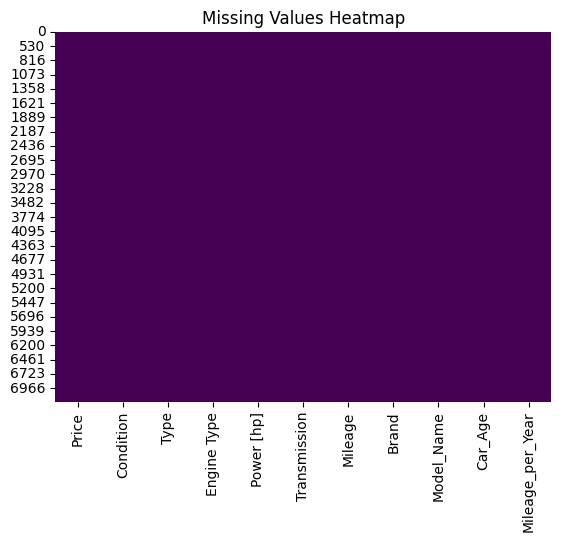

In [443]:
sns.heatmap(df_before.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

/var/folders/z6/2wcgq1vn4yj8hjypysf5ph6r0000gn/T/ipykernel_86515/1539474864.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')


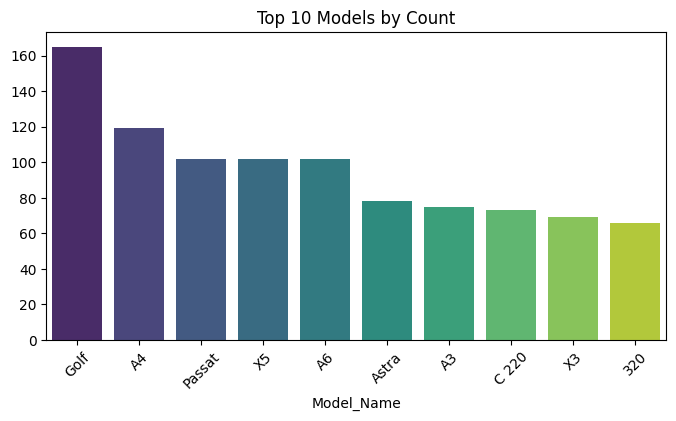

In [444]:
top_brands = df_before['Model_Name'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.title('Top 10 Models by Count')
plt.xticks(rotation=45)
plt.show()

/var/folders/z6/2wcgq1vn4yj8hjypysf5ph6r0000gn/T/ipykernel_86515/2359772159.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')


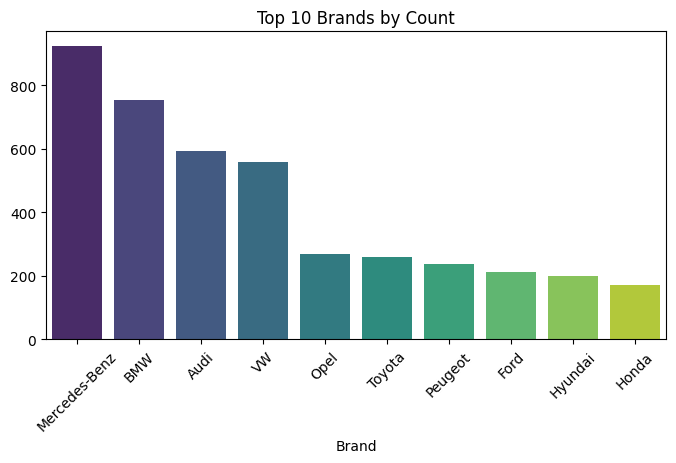

In [445]:
top_brands = df_before['Brand'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.title('Top 10 Brands by Count')
plt.xticks(rotation=45)
plt.show()

/var/folders/z6/2wcgq1vn4yj8hjypysf5ph6r0000gn/T/ipykernel_86515/1811895164.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_type.index, y=avg_price_by_type.values, palette='coolwarm')


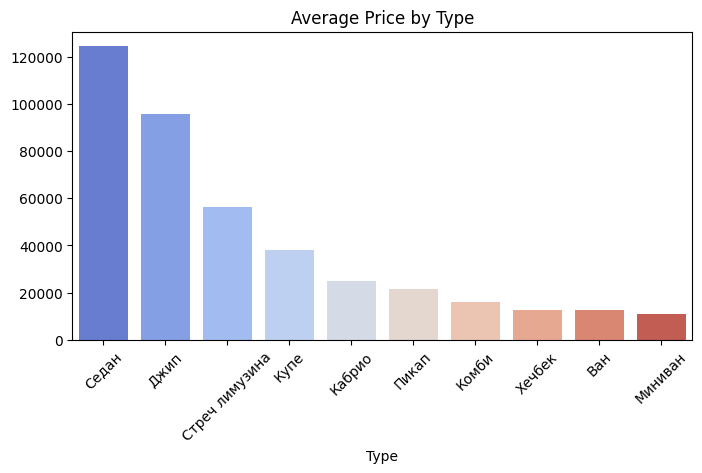

In [446]:
avg_price_by_type = df_before.groupby('Type')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_price_by_type.index, y=avg_price_by_type.values, palette='coolwarm')
plt.title('Average Price by Type')
plt.xticks(rotation=45)
plt.show()

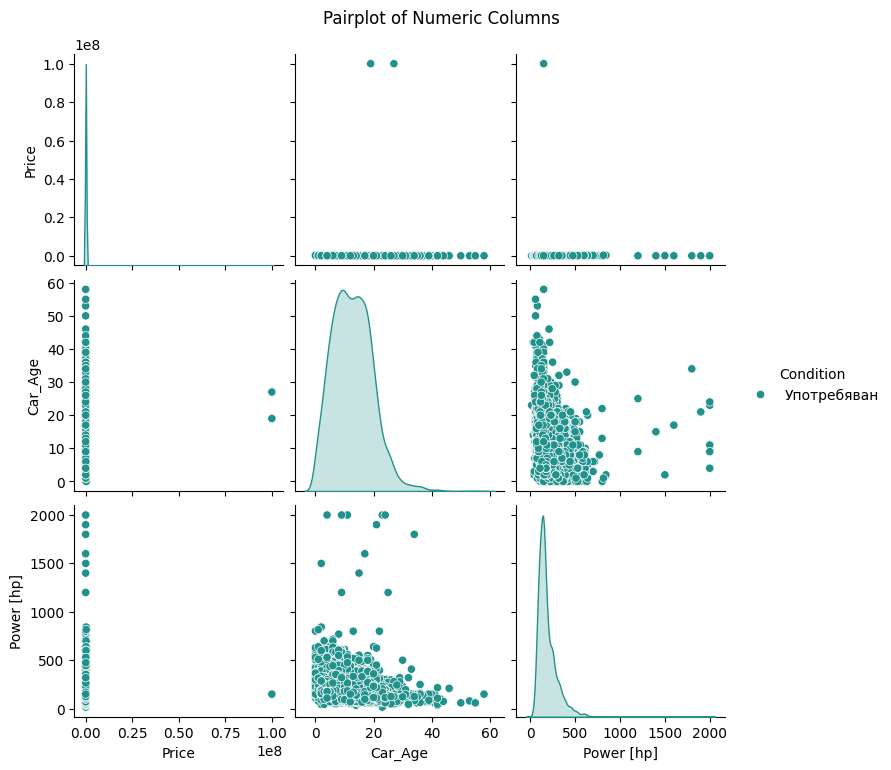

In [447]:
sns.pairplot(df_before, vars=['Price', 'Car_Age', 'Power [hp]'], hue='Condition', palette='viridis')
plt.suptitle('Pairplot of Numeric Columns', y=1.02)
plt.show()

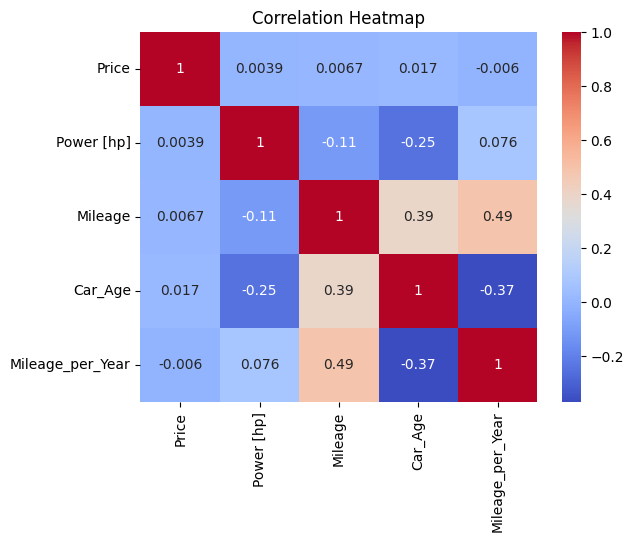

In [448]:
numeric_df = df_before.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Preprocessing & Modeling

### Filtering only realistic prices and mileage

In [449]:
df = df_before.copy()
df = df[(df['Price'] > 500) & (df['Price'] < 1500000)]


In [450]:
df = df[(df['Mileage'] > 0) & (df['Mileage'] < 1000000)]   


In [451]:
df.isna().sum()
df["Mileage_per_Year"].fillna(0, inplace=True)

/var/folders/z6/2wcgq1vn4yj8hjypysf5ph6r0000gn/T/ipykernel_86515/660914611.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Mileage_per_Year"].fillna(0, inplace=True)


#### Final Features
The final features used in the model are:

- Condition: Represents whether the car is new or used.

Transformation: Label encoded into numerical values.
Reason: Categorical variable with no inherent order, so encoding is necessary for the model to process it.

- Type: Represents the type of vehicle (e.g., Sedan, SUV).

Transformation: Label encoded into numerical values.
Reason: Categorical variable with no inherent order, so encoding is appropriate.

- Engine Type: Represents the type of fuel used (e.g., Petrol, Diesel).

Transformation: Extracted the fuel type from the string and label encoded.
Reason: Simplifies the representation and ensures the model can process it.

- Power [hp]: Represents the horsepower of the vehicle.

Transformation: Extracted numeric values from the string and scaled using StandardScaler.
Reason: Numerical variable with a wide range, so scaling ensures all features are on the same scale.

- Transmission: Represents the type of transmission (e.g., Automatic, Manual).

Transformation: Label encoded into numerical values.
Reason: Categorical variable with no inherent order, so encoding is necessary.

- Mileage: Represents the total distance the car has traveled.

Transformation: Extracted numeric values from the string and scaled using StandardScaler.
Reason: Numerical variable with a wide range, so scaling ensures consistency.

- Brand: Represents the car's brand (e.g., BMW, Audi).

Transformation: Extracted the brand from the model name and label encoded.
Reason: Categorical variable with no inherent order, so encoding is appropriate.

- Model_Name: Represents the specific model of the car.

Transformation: Label encoded into numerical values.
Reason: Categorical variable with no inherent order, so encoding is necessary.

- Car_Age: Represents the age of the car (calculated as 2025 - Manufactured Year).

Transformation: Created a new feature by subtracting the manufactured year from 2025.
Reason: Simplifies the model's understanding of the car's age.

- Mileage_per_Year: Represents the average mileage per year.

Transformation: Created a new feature by dividing mileage by car age.
Reason: Provides a better understanding of how much the car has been used annually.

#### Why the Representation is Appropriate
- Categorical Variables: Label encoding was used for categorical variables like Condition, Type, Engine Type, Transmission, Brand, and Model_Name. This is appropriate because these variables have no inherent order, and encoding allows the model to process them.
- Numerical Variables: Features like Power [hp], Mileage, Car_Age, and Mileage_per_Year were scaled using StandardScaler. This ensures that all numerical features are on the same scale, which is important for models sensitive to feature magnitudes (e.g., Random Forest, Decision Tree).
- Feature Engineering: New features like Car_Age and Mileage_per_Year were created to provide additional context to the model, improving its ability to capture relationships in the data.

#### Grouping or Encoding Values
- Brand: Brands were extracted from the Model column. If a brand was not explicitly listed, the first word of the model name was used as the brand. This ensures that all cars have a brand assigned.
- Possible Bias: Grouping rare brands into a single category (if done) could introduce bias by ignoring niche trends in pricing for less common brands.
- Model_Name: Specific models were label encoded. Rare models were not grouped into "Other" to preserve granularity.

#### Justification for Dropped Features
- Dropped Columns: Color, Listing_ID, Title, URL.
- Reason: These columns were either irrelevant to the prediction task (e.g., Listing_ID, URL) or had too many missing values (e.g., Color).

### Spliting the data

- Encoding the data and spliting it into test and train
- Scalling the numeric fetures

#### Candidate Algorithms and Why They Fit the Task
- Decision Tree Regressor:
Fits well for non-linear relationships in the data.
Easy to interpret and visualize.
Handles categorical and numerical data without requiring extensive preprocessing.

- Random Forest Regressor:
An ensemble method that reduces overfitting by averaging multiple decision trees.
Handles non-linear relationships and is robust to noise in the data.
Provides feature importance, which helps in understanding the model.

In [452]:
X = df.drop("Price", axis=1)
y = df["Price"]

label_encoders = {}
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt_model = DecisionTreeRegressor(random_state=42, max_depth=25, min_samples_split=25)
dt_model.fit(X_train, y_train)
dt_train_preds = dt_model.predict(X_train)
dt_test_preds = dt_model.predict(X_test)

dt_train_mae = mean_absolute_error(y_train, dt_train_preds)
dt_test_mae = mean_absolute_error(y_test, dt_test_preds)
dt_train_r2 = r2_score(y_train, dt_train_preds)
dt_test_r2 = r2_score(y_test, dt_test_preds)

rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=20, min_samples_split = 10)
rf_model.fit(X_train, y_train)
rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

rf_train_mae = mean_absolute_error(y_train, rf_train_preds)
rf_test_mae = mean_absolute_error(y_test, rf_test_preds)
rf_train_r2 = r2_score(y_train, rf_train_preds)
rf_test_r2 = r2_score(y_test, rf_test_preds)


In [453]:
results = {
    "Model": ["Decision Tree Regressor", "Random Forest Regressor"],
    "Train MAE": [dt_train_mae, rf_train_mae],
    "Test MAE": [dt_test_mae, rf_test_mae],
    "Train R²": [dt_train_r2, rf_train_r2],
    "Test R²": [dt_test_r2, rf_test_r2]
}

results_df = pd.DataFrame(results)

print(results_df)

                     Model    Train MAE     Test MAE  Train R²   Test R²
0  Decision Tree Regressor  5569.250509  8461.315126  0.831665  0.752164
1  Random Forest Regressor  4100.020207  7074.008209  0.913527  0.819146


### Analysis
1. Decision Tree Regressor
- Train MAE (5569.25): The average error on the training set is reasonable, but higher than Random Forest.
- Test MAE (8461.32): The error on the test set is significantly higher than the training error, indicating some overfitting.
- Train R² (0.8317): The model explains 83.2% of the variance in the training data, which is decent.
- Test R² (0.7522): The model explains 75.2% of the variance in the test data, which is lower than Random Forest.

Conclusion: The Decision Tree Regressor performs reasonably well but shows signs of overfitting. It does not generalize as well as the Random Forest Regressor.

2. Random Forest Regressor
- Train MAE (4100.02): The average error on the training set is lower than the Decision Tree, indicating better performance.
- Test MAE (7074.01): The test error is also lower than the Decision Tree, showing better generalization.
- Train R² (0.9135): The model explains 91.4% of the variance in the training data, which is excellent.
- Test R² (0.8191): The model explains 81.9% of the variance in the test data, which is higher than the Decision Tree.

Conclusion: The Random Forest Regressor outperforms the Decision Tree Regressor in both training and test metrics. It generalizes better and has a smaller gap between train and test performance, indicating less overfitting.

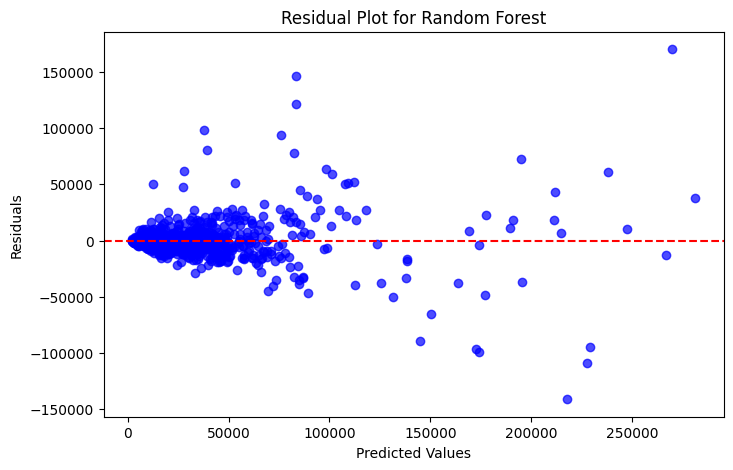

In [454]:
rf_residuals = y_test - rf_test_preds

plt.figure(figsize=(8, 5))
plt.scatter(rf_test_preds, rf_residuals, alpha=0.7, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#### Decision Tree

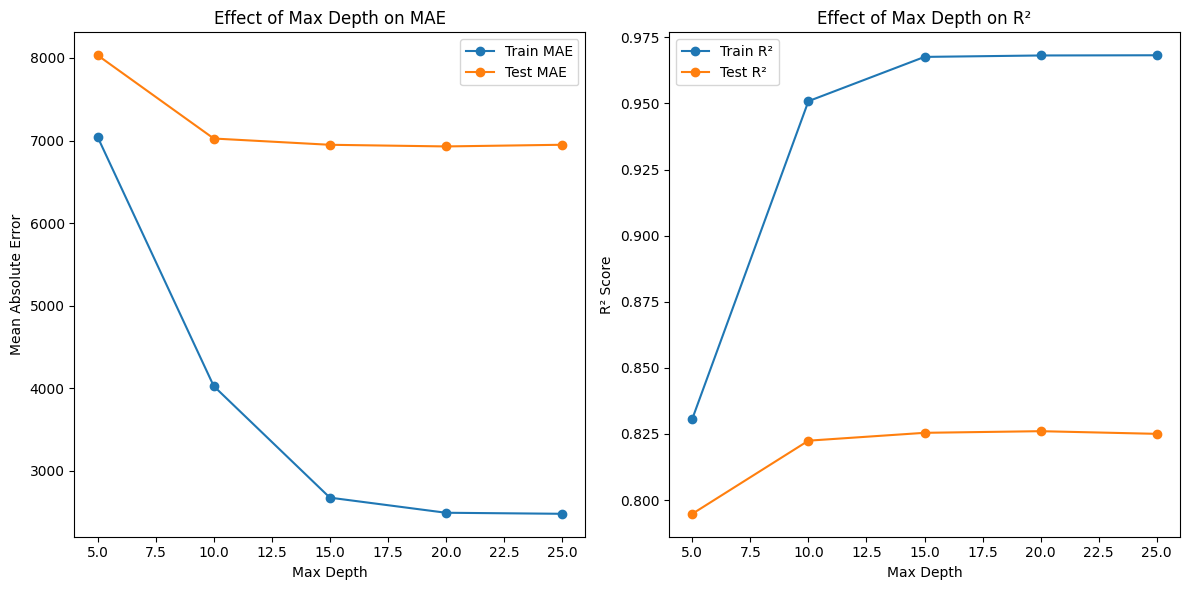

In [455]:
max_depth_values = [5, 10, 15, 20, 25, None]
train_mae = []
test_mae = []
train_r2 = []
test_r2 = []

for max_depth in max_depth_values:
    rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=max_depth)
    rf_model.fit(X_train, y_train)
    
    train_preds = rf_model.predict(X_train)
    test_preds = rf_model.predict(X_test)
    
    train_mae.append(mean_absolute_error(y_train, train_preds))
    test_mae.append(mean_absolute_error(y_test, test_preds))
    train_r2.append(r2_score(y_train, train_preds))
    test_r2.append(r2_score(y_test, test_preds))

plt.figure(figsize=(12, 6))

# MAE Plot
plt.subplot(1, 2, 1)
plt.plot(max_depth_values, train_mae, label="Train MAE", marker='o')
plt.plot(max_depth_values, test_mae, label="Test MAE", marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Mean Absolute Error")
plt.title("Effect of Max Depth on MAE")
plt.legend()

# R² Plot
plt.subplot(1, 2, 2)
plt.plot(max_depth_values, train_r2, label="Train R²", marker='o')
plt.plot(max_depth_values, test_r2, label="Test R²", marker='o')
plt.xlabel("Max Depth")
plt.ylabel("R² Score")
plt.title("Effect of Max Depth on R²")
plt.legend()

plt.tight_layout()
plt.show()

#### Random Forest

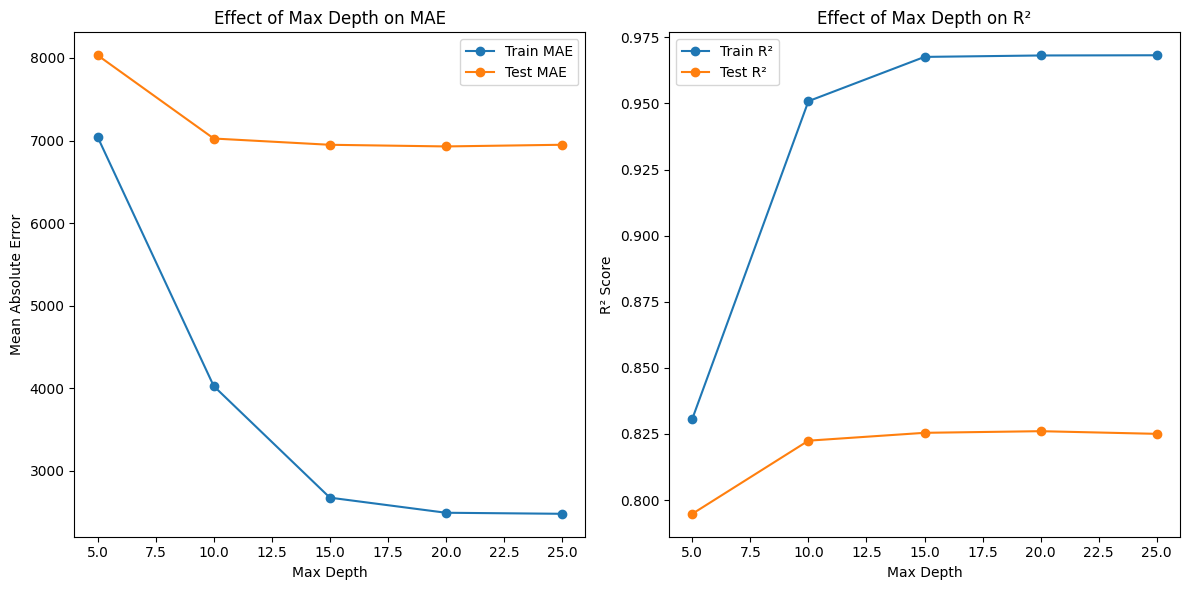

In [456]:
max_depth_values = [5, 10, 15, 20, 25, None]
train_mae = []
test_mae = []
train_r2 = []
test_r2 = []

for max_depth in max_depth_values:
    rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=max_depth)
    rf_model.fit(X_train, y_train)
    
    
    train_preds = rf_model.predict(X_train)
    test_preds = rf_model.predict(X_test)
    
    train_mae.append(mean_absolute_error(y_train, train_preds))
    test_mae.append(mean_absolute_error(y_test, test_preds))
    train_r2.append(r2_score(y_train, train_preds))
    test_r2.append(r2_score(y_test, test_preds))

plt.figure(figsize=(12, 6))

# MAE Plot
plt.subplot(1, 2, 1)
plt.plot(max_depth_values, train_mae, label="Train MAE", marker='o')
plt.plot(max_depth_values, test_mae, label="Test MAE", marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Mean Absolute Error")
plt.title("Effect of Max Depth on MAE")
plt.legend()

# R² Plot
plt.subplot(1, 2, 2)
plt.plot(max_depth_values, train_r2, label="Train R²", marker='o')
plt.plot(max_depth_values, test_r2, label="Test R²", marker='o')
plt.xlabel("Max Depth")
plt.ylabel("R² Score")
plt.title("Effect of Max Depth on R²")
plt.legend()

plt.tight_layout()
plt.show()

 #### Train vs. Test Performance and Learning Curves

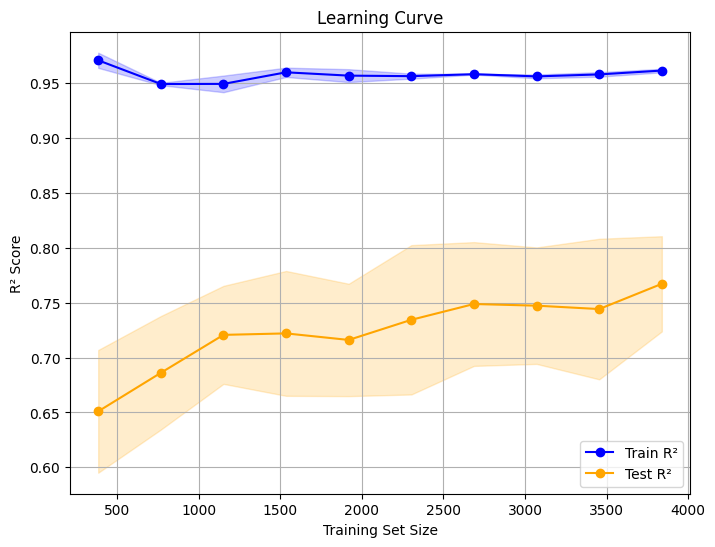

In [457]:
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(random_state=42, n_estimators=25, max_depth=25),
    X_train,
    y_train,
    cv=5,
    scoring="r2",
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42,
)

# Calculate mean and standard deviation for train/test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Train R²", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_mean, label="Test R²", color="orange", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="orange")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend()
plt.grid()
plt.show()

Possible overfit

Cross-Validation R² Scores: [0.80485818 0.82659425 0.67994552 0.75976433 0.77514269]
Mean R²: 0.7692609925773993
Standard Deviation of R²: 0.050311622498895606


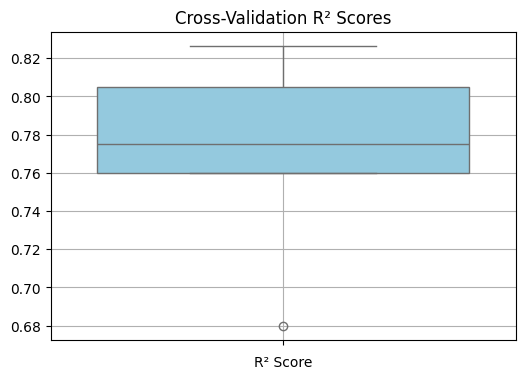

In [458]:
cv_scores = cross_val_score(
    RandomForestRegressor(random_state=42, n_estimators=100, max_depth=25),
    X_train,
    y_train,
    cv=5,
    scoring="r2"
)

print("Cross-Validation R² Scores:", cv_scores)
print("Mean R²:", np.mean(cv_scores))
print("Standard Deviation of R²:", np.std(cv_scores))

plt.figure(figsize=(6, 4))
sns.boxplot(cv_scores, color="skyblue")
plt.title("Cross-Validation R² Scores")
plt.xlabel("R² Score")
plt.grid()
plt.show()

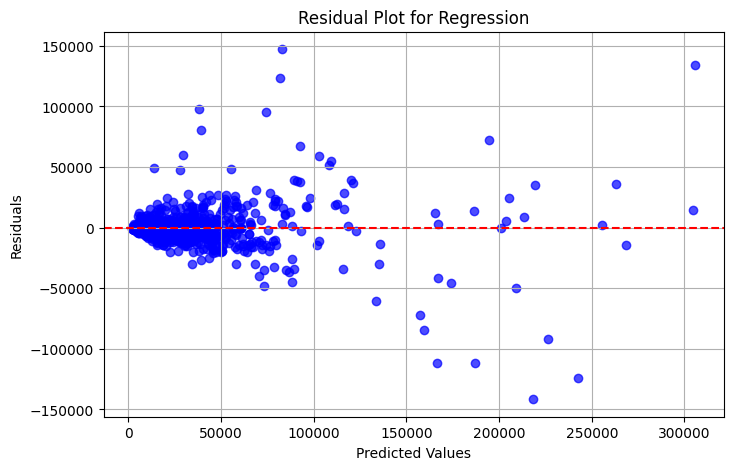

Mean Absolute Error (MAE): 6931.903438194445
Mean Squared Error (MSE): 240796558.38719758
R² Score: 0.8260602424593553


In [459]:

y_pred = rf_model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.7, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Residual Plot for Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid()
plt.show()

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

### Function for predicting a car's price
- Handels unseen labels safety
- Encodes categorial columns 
- Scale numeric data

In [460]:
def predict_car(car_dict):
    car_df = pd.DataFrame([car_dict])

    for col in car_df.columns:
        if col in label_encoders:
            le = label_encoders[col]
            car_df[col] = car_df[col].apply(lambda x: x if x in le.classes_ else le.classes_[0])
            car_df[col] = le.transform(car_df[col])

    car_df = car_df.reindex(columns=X.columns, fill_value=0)
    car_scaled = scaler.transform(car_df)

    prediction = rf_model.predict(car_scaled)[0]

    return prediction


### Example of prediction

In [461]:
new_car = {
    'Condition': 'Употребяван',
    'Type': 'Седан',
    'Engine Type': 'Бензин',
    'Power [hp]': 550,
    'Transmission': 'Автоматична',
    'Mileage': 10000,
    'Brand': 'Aston-Martin',
    'Model_Name': 'DB11',
    'Car_Age': 4,
    'Mileage_per_Year': 6
}

predicted_price = predict_car(new_car)
print("Predicted Price:", round(predicted_price, 2))


Predicted Price: 198473.66
